# 用Matplotlib画三维图

`Matplotlib` 原本只能画二维图。大概在 `1.0` 版本的时候，`Matplotlib` 实现了一些建立在二维图基础上的三维图功能，于是一组画三维图可视化的便捷（尚不完美）工具便诞生了。  
我们可以导入 `Matplotlib` 自带的 `mplot3d` 工具箱来画三维图。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from mpl_toolkits import mplot3d

# 导入这个子模块之后，就可以在创建任意一个普通坐标轴的过程中加入projection='3d' 关键字，从而创建一个三维坐标轴：

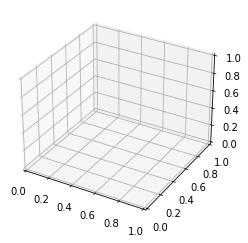

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')  # 一个空的三维坐标轴

有了三维坐标轴之后，我们就可以在上面画出各种各样的三维图了。三维图的优点是在 `Notebook` 里面可以交互浏览而非静止不动；  
和之前介绍的交互式图形一样，需要用 `%matplotlib notebook` 而不是 `%matplotlib inline` 运行代码。

## 1. 三维数据点与线

最基本的三维图是由 `(x, y, z)` 三维坐标点构成的线图与散点图。与前面介绍的普通二维图类似，可以用 `ax.plot3D` 与 `ax.scatter3D` 函数来创建它们。  
三维图函数的参数与前面二维图函数的参数基本相同。

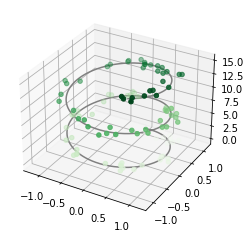

In [4]:
# 下面来画一个三角螺旋线（trigonometric spiral），在线上随机分布一些散点
ax = plt.axes(projection='3d')

# 三维线的数据
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# 三维散点的数据
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

默认情况下，散点会自动改变透明度，以在平面上呈现出立体感。有时在静态图形上观察三维效果很费劲，通过交互视图（`interactive view`）就可以让所有数据点呈现出极佳的视觉效果。

## 2. 三维等高线图

与 `4.6` 节介绍的等高线类似，`mplot3d` 也有用同样的输入数据创建三维晕渲（`relief`）图的工具。  
与二维 `ax.contour` 图形一样，`ax.contour3D` 要求所有数据都是二维网格数据的形式，并且由函数计算 `z` 轴数值。

In [5]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Text(0.5, 0, 'z')

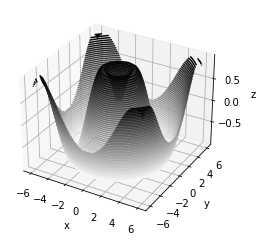

In [6]:
# 一个用三维正弦函数画的三维等高线图
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

默认的初始观察角度有时不是最优的，`view_init` 可以调整观察角度与方位角（`azimuthal angle`）。

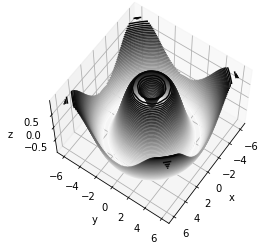

In [7]:
# 把俯仰角调整为 60 度（这里的 60 度是 x-y 平面的旋转角度），方位角调整为 35 度（就是绕 z 轴顺时针旋转 35 度）
ax.view_init(60, 35)
fig

其实，也可以在 `Matplotlib` 的交互式后端界面直接通过点击、拖拽图形，实现同样的交互旋转效果。

## 3. 线框图和曲面图

还有两种画网格数据的三维图没有介绍，就是线框图和曲面图。它们都是将网格数据映射成三维曲面，得到的三维形状非常容易可视化。

Text(0.5, 0.92, 'wireframe')

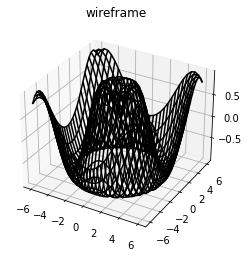

In [8]:
# 线框图示例
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe')

曲面图与线框图类似，只不过线框图的每个面都是由多边形构成的。只要增加一个配色方案来填充这些多边形，就可以让读者感受到可视化图形表面的拓扑结构了。

Text(0.5, 0.92, 'surface')

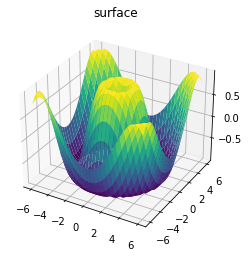

In [9]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('surface')

需要注意的是，画曲面图需要二维数据，但可以不是直角坐标系（也可以用极坐标 `polar grid`）。

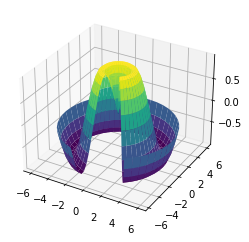

In [10]:
# 下面的示例创建了一个局部的极坐标网格（polar grid），当我们把它画成 surface3D 图形时，可以获得一种使用了切片的可视化效果：
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

## 4. 曲面三角剖分

在某些应用场景中，上述这些要求均匀采样的网格数据显得太过严格且不太容易实现。这时就可以使用三角剖分图形（`triangulation-based plot`）了。  
如果没有笛卡尔或极坐标网格的均匀绘制图形，我们该如何用一组随机数据画图呢？

In [11]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

可以先为数据点创建一个散点图，对将要采样的图形有一个基本认识：

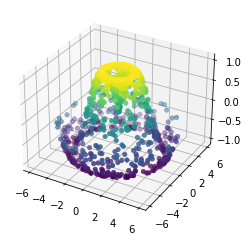

In [12]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5)

还有许多地方需要修补，这些工作可以由 `ax.plot_trisurf` 函数帮助我们完成。  
它首先找到一组所有点都连接起来的三角形，然后用这些三角形创建曲面（结果如下图所示，其中 x、y 和 z 参数都是一维数组）：

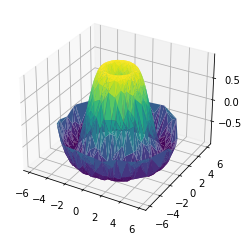

In [13]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')

虽然结果肯定没有之前用均匀网格画的图完美，但是这种三角剖分方法很灵活，可以创建各种有趣的三维图。例如，可以用它画一条三维的莫比乌斯带。

### 4.1 案例：莫比乌斯带

莫比乌斯带是把一根纸条扭转 `180` 度后，再把两头粘起来做成的纸带圈。从拓扑学的角度看，莫比乌斯带非常神奇，因为它总共只有一个面！  
下面我们就用 `Matplotlib` 的三维工具来画一条莫比乌斯带。此时的关键是想出它的绘图参数：  
由于它是一条二维带，因此需要两个内在维度（`intrinsic dimensions`）。让我们把一个维度定义为 `θ`，取值范围为 `0~2π`；另一个维度是 `w`，取值范围是 `-1~1`，表示莫比乌斯带的宽度：

In [14]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

有了参数之后，我们必须确定带上每个点的直角坐标 `(x, y, z)`。仔细思考一下，我们可能会找到两种旋转关系：  
一种是圆圈绕着圆心旋转（角度用 `θ` 定义），另一种是莫比乌斯带在自己的坐标轴上旋转（角度用 `Φ` 定义）。  
因此，对于一条莫比乌斯带，我们必然会有环的一半扭转 `180` 度，即 `ΔΦ = Δθ / 2`。

In [15]:
phi = 0.5 * theta

现在用我们的三角学知识将极坐标转换成三维直角坐标。定义每个点到中心的距离（半径）`r`，那么直角坐标 `(x, y, z)` 就是：

In [16]:
# x-y 平面内的半径
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

最后，要画出莫比乌斯带，还必须确保三角剖分是正确的。最好的实现方法就是首先用基本参数化方法定义三角剖分，然后用 `Matplotlib` 将这个三角剖分映射到莫比乌斯带的三维空间里，这样就可以画出图形。

(-1.0, 1.0)

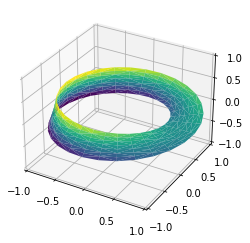

In [17]:
# 用基本参数化方法定义三角剖分
from matplotlib.tri import Triangulation

tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap='viridis', linewidths=0.2)

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1)